In [164]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y')
data = read_csv("coffeeDonors.csv", parse_dates=[2], date_parser=parser)
data = data.sort_values(by = "Date")
data.head()

,Name,Amount,Date
0,Dylan,500,2014-09-16
1,Joe,227,2014-10-10
2,William,227,2014-10-20
3,Joe,227,2014-10-23
4,Peter,500,2014-10-25


In [214]:
int((datetime.now() - data["Date"][1]).days)

508

In [167]:
data[data.Name == 'Amir']

,Name,Amount,Date
16,Amir,260,2015-01-28
23,Amir,450,2015-03-01
34,Amir,227,2015-04-26
43,Amir,227,2015-06-09
44,Amir,227,2015-06-16
56,Amir,227,2015-10-15


In [168]:
data["Month"] = data["Date"].dt.month

In [169]:
data.head()

,Name,Amount,Date,Month
0,Dylan,500,2014-09-16,9
1,Joe,227,2014-10-10,10
2,William,227,2014-10-20,10
3,Joe,227,2014-10-23,10
4,Peter,500,2014-10-25,10


,Amount,Month
Name,,
Joe,6209,128
Steve,3902,53
Eilon,3708,40
Helen,3169,36
Peter,2727,40


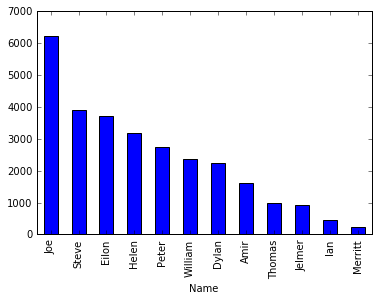

In [241]:
groupedDataByName = data.groupby("Name")
groupDataByNameSorted = groupedDataByName.sum().sort_values(by = "Amount", ascending = False)
groupDataByNameSorted.Amount.plot(kind='bar')
groupDataByNameSorted.head()

In [239]:
consumptionData = read_csv("coffeeConsumption.csv").set_index("Name")
consumptionData["paid per kg"] = np.round(consumptionData["paid (pound)"]/consumptionData["per weight (g)"] * 1000)
consumptionData["used coffee for (days)"] = consumptionData["Been here for (months)"]*30
consumptionData.loc[consumptionData["used coffee for (days)"] > int((datetime.now() - data["Date"][1]).days),\
                    "used coffee for (days)"] = int((datetime.now() - data["Date"][1]).days)
consumptionData["Amount of coffee used (cups)"] = np.round(consumptionData["consumption (cups)"] * \
                    consumptionData["used coffee for (days)"] * 4/7)
consumptionData.head()

,Been here for (months),consumption (cups),paid (pound),per weight (g),paid per kg,used coffee for (days),Amount of coffee used (cups)
Name,,,,,,,
Dylan,32,1.5,3,227,13,508,435
Jelmer,6,4.0,13,1000,13,180,411
Eilon,29,1.5,18,1000,18,508,435


In [248]:
allData = pd.merge(groupDataByNameSorted, consumptionData, left_index=True, right_index=True)
allData.head()

,Amount,Month,Been here for (months),consumption (cups),paid (pound),per weight (g),paid per kg,used coffee for (days),Amount of coffee used (cups)
Name,,,,,,,,,
Dylan,2227,28,32,1.5,3,227,13,508,435
Jelmer,908,9,6,4.0,13,1000,13,180,411
Eilon,3708,40,29,1.5,18,1000,18,508,435


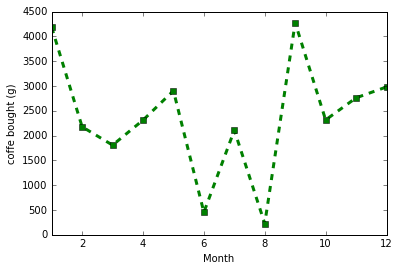

In [188]:
groupedByMonth = data.groupby("Month")
groupedbyMonthSorted = groupedByMonth.sum()
groupedbyMonthSorted.Amount.plot(linestyle='--', marker='s', color="g", lw = 3)
plt.ylabel("coffe bought (g)")
plt.savefig("vsMonths.pdf")

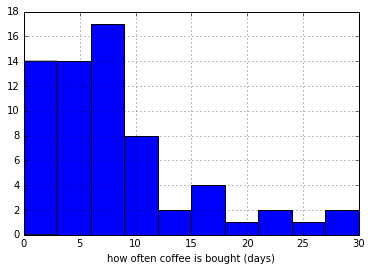

In [182]:
d1 = data["Date"][1:].reset_index(drop=True)
d2 = data["Date"][:-1].reset_index(drop=True)
((d1-d2).dt.days).hist()
plt.xlabel('how often coffee is bought (days)')

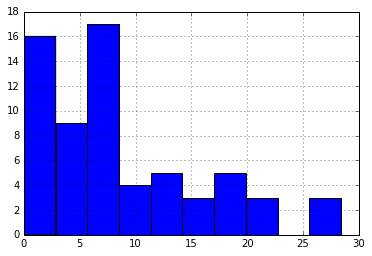

In [186]:
a1 = data["Amount"][:-1]
(((d1-d2).dt.days)/a1*np.mean(a1)).hist()